# My Resume
Creating a word cloud out of the experience and skills on my resume.

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 99)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Pull the Data

In [2]:
df1 = pd.read_fwf("./data/Meggan_Lanpher_Resume.txt", delimiter="\n", header=1)
df1['info'] = df1['Austin, TX  |  972-832-7529  |  meggan.lanpher@gmail.com  |  LinkedIn:/in/meggan-lanpher/']
df1 = df1.drop(columns="Austin, TX  |  972-832-7529  |  meggan.lanpher@gmail.com  |  LinkedIn:/in/meggan-lanpher/").copy()
print(df1.shape)
df1.head()

(28, 1)


,info
0,GitHub: /megganlanpher
1,A solutions-driven data scientist with an interest in solving complex problems. I have a libera...
2,TECHNICAL SKILLS
3,"Python, Scala, Spark, SQL, Pandas, Sci-Kit Learn, NLTK, Beautiful Soup, Tableau, Matplotlib, Se..."
4,EXPERIENCE


In [3]:
df2 = pd.read_fwf("./data/resume_02_07.txt", delimiter="\n", header=1)
df2['info'] = df2['Austin, TX\xa0 ']
df2 = df2.drop(columns="Austin, TX\xa0 ").copy()
print(df2.shape)
df2.head()

(32, 1)


,info
0,"A solutions-driven data scientist proficient in quantitative analysis, pythonic engineering, an..."
1,Technical Skills:
2,\t•\tProgramming | Python | Scala
3,\t•\tMachine Learning | Sci-Kit Learn | TensorFlow | Spark
4,\t•\tStatistical Modeling | Linear Regression | Logistic Regression | KNN | LASSO | R...


In [4]:
df = pd.concat([df1, df2])
df.shape

(60, 1)

## Create the Word Cloud

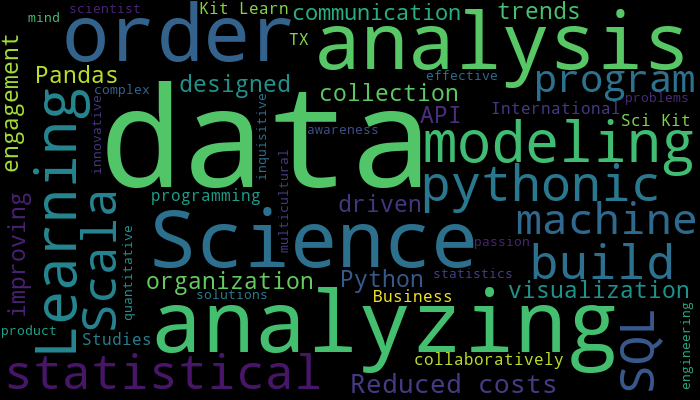

In [5]:
custom_stops = ["office", "Austin", "skills", "2019", "10", "austin",
                "Beautiful", "women", "break", "room", "parking"]
stops = list(ENGLISH_STOP_WORDS) + custom_stops

wc = wordcloud.WordCloud(width=700, height=400, max_words=50\
                    , stopwords=stops)
text = df['info'].str.cat()

wc.generate_from_text(text)
wc.to_file('./images/resume_wordcloud.png')
wc.to_image()

## Word Frequency Analysis

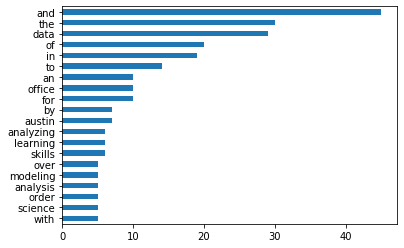

In [6]:
## NO STOPS
cv = CountVectorizer()

vect_df = pd.DataFrame(cv.fit_transform(df['info']).todense(), columns= cv.get_feature_names())

vect_df.sum().sort_values().tail(20).plot.barh();

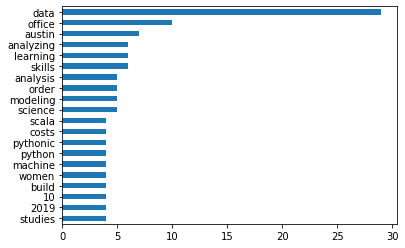

In [7]:
## STANDARD STOPS
cv = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

vect_df = pd.DataFrame(cv.fit_transform(df['info']).todense(), columns= cv.get_feature_names())

vect_df.sum().sort_values().tail(20).plot.barh();

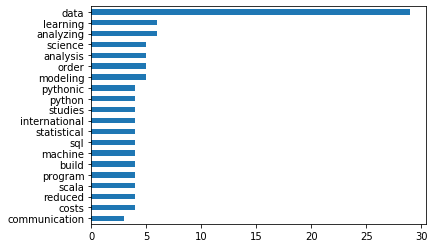

In [8]:
## CUSTOM STOPS
cv = CountVectorizer(stop_words=stops)

vect_df = pd.DataFrame(cv.fit_transform(df['info']).todense(), columns= cv.get_feature_names())

vect_df.sum().sort_values().tail(20).plot.barh();

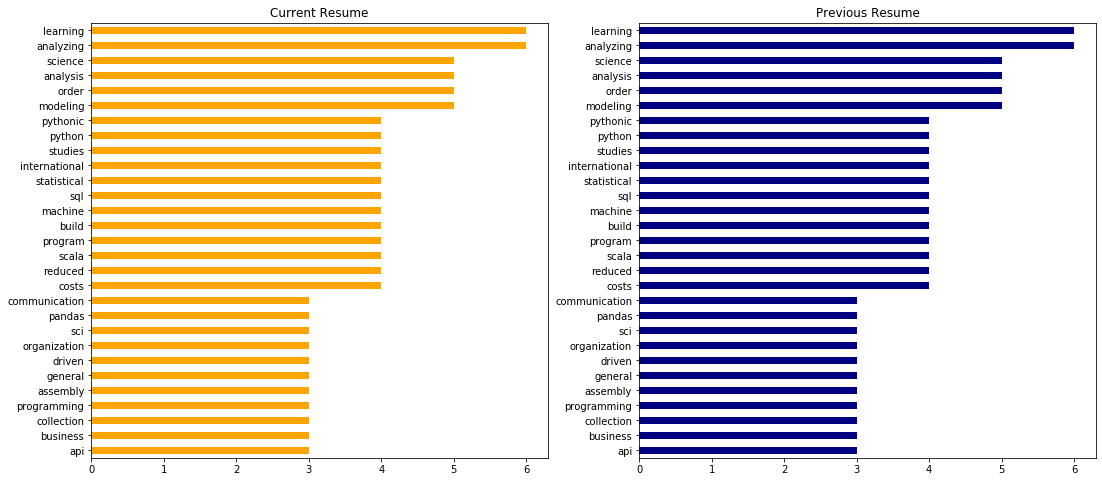

In [9]:
top_words = list(vect_df.sum().sort_values().tail(30).index)
top_words.remove("data")
vect_df1 = pd.DataFrame(cv.fit_transform(df['info']).todense(),
                        columns= cv.get_feature_names())
vect_df2 = pd.DataFrame(cv.fit_transform(df['info']).todense(),
                        columns= cv.get_feature_names())

fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))

vect_df1.loc[:, top_words].sum().plot.barh(ax=ax1, color='orange')
vect_df2.loc[:, top_words].sum().plot.barh(ax=ax2, color='navy')

ax1.set_title('Current Resume')
ax2.set_title('Previous Resume');
plt.savefig('./images/word-frequency-comparison.png')

## Sentence, Word and Character Lengths
Is there a difference between the resumes?

In [10]:
def get_len(df):
    return df['info'].map(lambda x: len(x.split()))

def get_char_len(df):
    return df['info'].map(lambda x: len(x))

def get_word_len(df):
    return df['info'].map(lambda x: len(x) / len(x.split()))

df1len = get_len(df1)
df2len = get_len(df2)

df1lenchar = get_char_len(df1)
df2lenchar = get_char_len(df2)

df1lenword = get_word_len(df1)
df2lenword = get_word_len(df2)

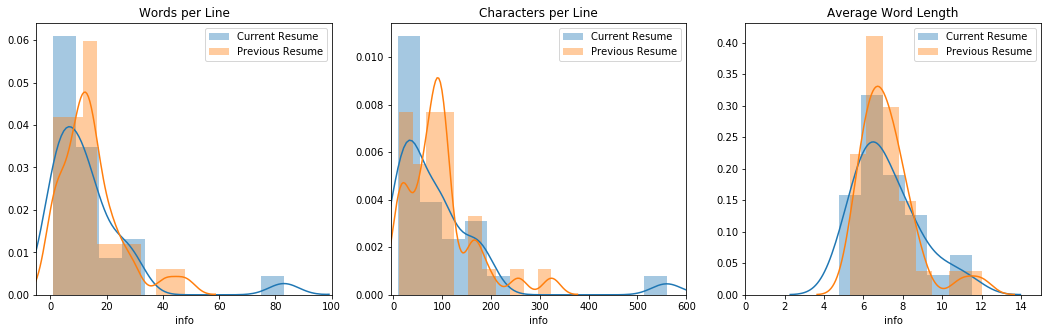

In [11]:
fig , (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,5))

sns.distplot(df1len, label = 'Current Resume', ax=ax1)
sns.distplot(df2len, label = 'Previous Resume', ax=ax1)
ax1.set_xbound(-5,100)
ax1.legend()
ax1.set_title('Words per Line');

sns.distplot(df1lenchar, label = 'Current Resume', ax=ax2)
sns.distplot(df2lenchar, label = 'Previous Resume', ax=ax2)
ax2.set_xbound(-5,600)
ax2.legend()
ax2.set_title('Characters per Line');

sns.distplot(df1lenword, label = 'Current Resume', ax=ax3)
sns.distplot(df2lenword, label = 'Previous Resume', ax=ax3)
ax3.set_xbound(0,15)
ax3.legend()
ax3.set_title('Average Word Length');

plt.savefig('./images/words-by-line-comparison.png')

# Model 
Can we predict which resume a line originated from? 

In [12]:
df1['resume_current'] = 1
df1.head()

,info,resume_current
0,GitHub: /megganlanpher,1
1,A solutions-driven data scientist with an interest in solving complex problems. I have a libera...,1
2,TECHNICAL SKILLS,1
3,"Python, Scala, Spark, SQL, Pandas, Sci-Kit Learn, NLTK, Beautiful Soup, Tableau, Matplotlib, Se...",1
4,EXPERIENCE,1


In [13]:
df2['resume_current'] = 0
df2.head()

,info,resume_current
0,"A solutions-driven data scientist proficient in quantitative analysis, pythonic engineering, an...",0
1,Technical Skills:,0
2,\t•\tProgramming | Python | Scala,0
3,\t•\tMachine Learning | Sci-Kit Learn | TensorFlow | Spark,0
4,\t•\tStatistical Modeling | Linear Regression | Logistic Regression | KNN | LASSO | R...,0


In [14]:
df_1_2 = pd.concat([df1, df2])
print(df_1_2.shape)
df_1_2.head()

(60, 2)


,info,resume_current
0,GitHub: /megganlanpher,1
1,A solutions-driven data scientist with an interest in solving complex problems. I have a libera...,1
2,TECHNICAL SKILLS,1
3,"Python, Scala, Spark, SQL, Pandas, Sci-Kit Learn, NLTK, Beautiful Soup, Tableau, Matplotlib, Se...",1
4,EXPERIENCE,1


In [15]:
stops_data = stops + ['data']

X = df_1_2['info']
y = df_1_2['resume_current']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y)

In [16]:
pipe_cv = Pipeline([
    ('cv', CountVectorizer(max_df=.9)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=1e6))
])

params_grid_cv = {
    'cv__max_features': [100, 500, 700],
    'cv__stop_words': [ENGLISH_STOP_WORDS, stops, None, stops_data],
    'cv__ngram_range': [(1,1), (1,2), (1,3)],
    'cv__min_df' : [3, 2]
}

gs_cv = GridSearchCV(pipe_cv, params_grid_cv, cv=5)
gs_cv.fit(X_train, y_train)
print(f'GridSearch Score on LogisticRegression - CV training data is {gs_cv.score(X_train, y_train)}.')
print(f'GridSearch Score on LogisticRegression - CV testing data is {gs_cv.score(X_test, y_test)}.')
print('Baseline accuracy score is', y.value_counts(normalize=True)[0])

GridSearch Score on LogisticRegression - CV training data is 0.6444444444444445.
GridSearch Score on LogisticRegression - CV testing data is 0.4666666666666667.
Baseline accuracy score is 0.5333333333333333


In [17]:
cv_lr_estimator = gs_cv.best_estimator_
cv_lr_estimator

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.9,
                                 max_features=100, min_df=3, ngram_range=(1, 1),
                                 preprocessor=None,
                                 stop_words=['more', 'under', 'she', 'itself',
                                             'afterwards', 'except', 'side',
                                             'only', 'us', 'with', 'already',
                                             '...
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class

,LogR_Coef
2018,0.362188
analysis,-0.324965
analyzing,0.273876
build,-0.217013
business,-0.121685
collection,-0.110366
costs,-0.187832
data,0.023749
designed,0.568026
learning,-0.119650


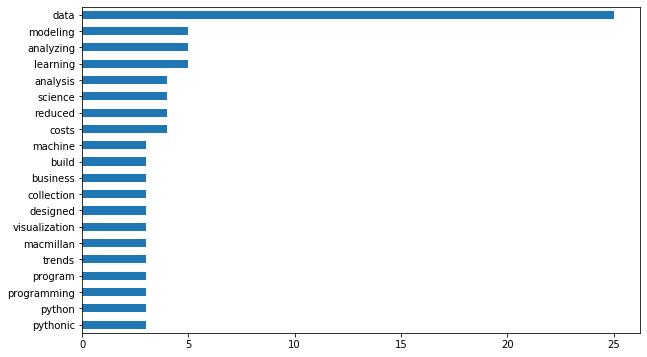

In [18]:
cv_estimator = gs_cv.best_estimator_[0]

df_words_cv = pd.DataFrame(gs_cv.best_estimator_[1].coef_,
                        columns=cv_estimator.get_feature_names(),
                        index=['LogR_Coef']).T


df_X_cv = pd.DataFrame(cv_estimator.fit_transform(X_train).todense(),
              columns=cv_estimator.get_feature_names())

fig , ax = plt.subplots(figsize=(10,6))

df_X_cv.sum().sort_values().tail(20).plot.barh();

df_words_cv

In [19]:
preds_cv = gs_cv.predict(X_test)
conf_cv = pd.DataFrame(confusion_matrix(y_test,
                                        preds_cv),
                       columns=['Predicted Previous Resume',
                                'Predicted Current Resume'],
             index=['Actual Previous Resume',
                    'Actual Current Resume'])
print("Accuracy score:",accuracy_score(y_test, preds_cv))
print()

# predicting if subreddit == askeconomists (as opposed to AskEconomics)

tn_cv, fp_cv, fn_cv, tp_cv  = confusion_matrix(y_test, preds_cv).ravel()

conf_cv

Accuracy score: 0.4666666666666667



,Predicted Previous Resume,Predicted Current Resume
Actual Previous Resume,7,1
Actual Current Resume,7,0


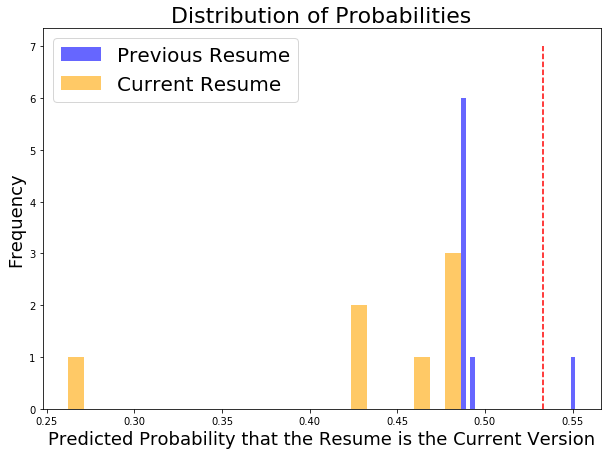

In [20]:
pred_proba = [i[1] for i in cv_lr_estimator.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

plt.figure(figsize = (10,7))

plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Previous Resume')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Current Resume')

# Add vertical line at the baseline accuracy score.
plt.vlines(x=y.value_counts(normalize=True)[0],
           ymin = 0,
           ymax = 7,
           color='r',
           linestyle = '--')

plt.title('Distribution of Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that the Resume is the Current Version', fontsize=18)

plt.legend(fontsize=20);

plt.savefig("./images/pred_proba-comparison-hist.png")